In [95]:
import pandas as pd
import numpy as np
import os
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

In [96]:
# Put the directory of the abalone dataset here
os.chdir(r"/content/drive/My Drive/STA-ML/HW3/")

path = os.getcwd()
print(path)

/content/drive/My Drive/STA-ML/HW3


In [97]:
# Load data into DataFrame
train_data = pd.read_csv(path+'/hill-valley/X.dat',sep=' ',header=None)
test_data = pd.read_csv(path+'/hill-valley/Xtest.dat',sep=' ',header=None)
train_labels = pd.read_csv(path+'/hill-valley/Y.dat',sep=' ',header=None)
test_labels = pd.read_csv(path+'/hill-valley/Ytest.dat',sep=' ',header=None)
# Add a foward column  of 1's on training datafor the linear constant

#data.insert(0,'const',1)

print(train_data)
print(train_labels)

           0         1         2   ...        97        98        99
0       39.02     36.49     38.20  ...     39.46     37.50     39.10
1        1.83      1.71      1.77  ...      1.78      1.75      1.69
2    68177.69  66138.42  72981.88  ...  71063.72  67404.27  74920.24
3    44889.06  39191.86  40728.46  ...  43095.68  40888.34  39615.19
4        5.70      5.40      5.28  ...      5.30      5.73      5.91
..        ...       ...       ...  ...       ...       ...       ...
601   2064.63   2174.44   2249.02  ...   2096.08   2114.25   2281.91
602      9.42      9.30      9.66  ...      9.23      9.82      9.57
603      5.31      5.03      5.17  ...      5.14      5.12      5.04
604      1.03      1.02      1.09  ...      1.10      1.11      1.07
605     61.77     58.63     63.06  ...     65.13     59.74     63.86

[606 rows x 100 columns]
     0
0    0
1    1
2    1
3    0
4    0
..  ..
601  0
602  0
603  0
604  0
605  0

[606 rows x 1 columns]


In [98]:
X = train_data.iloc[:,0:100].values
Xtest = test_data.iloc[:,0:100].values

print(X.shape, Xtest.shape)

(606, 100) (606, 100)


In [99]:
Y = train_labels.iloc[:].values
Ytest = test_labels.iloc[:].values

print(Y.shape, Ytest.shape)

(606, 1) (606, 1)


In [100]:
from sklearn.preprocessing import StandardScaler

#Apply standardization to training and test data,
#Centering both around the training instances mean and standard deviation
ss=StandardScaler()
ss.fit(X)
tf_X_train=ss.transform(X)
tf_X_test=ss.transform(Xtest)
print(tf_X_train,tf_X_train.shape,"\n")
print(tf_X_test,tf_X_test.shape)


[[-0.44166458 -0.44356351 -0.44100773 ... -0.44595977 -0.44194172
  -0.44501586]
 [-0.44372966 -0.44551188 -0.44303191 ... -0.44808909 -0.44392922
  -0.44711434]
 [ 3.34193057  3.25945986  3.61200678 ...  3.56767136  3.30328408
   3.75536   ]
 ...
 [-0.44353642 -0.4453259  -0.442843   ... -0.44789921 -0.44374187
  -0.44692642]
 [-0.44377408 -0.44555054 -0.4430697  ... -0.44812752 -0.44396481
  -0.44714912]
 [-0.44040132 -0.44232323 -0.43962642 ... -0.44450914 -0.4407053
  -0.44362698]] (606, 100) 

[[-0.44218654 -0.44404192 -0.44160115 ... -0.44665767 -0.44243484
  -0.44561495]
 [-0.44051682 -0.44254451 -0.44033152 ... -0.44518953 -0.44073198
  -0.44390913]
 [-0.44080001 -0.44268792 -0.44007537 ... -0.44540709 -0.44126958
  -0.44408415]
 ...
 [ 0.12036797  0.06129565  0.05666112 ...  0.13761387  0.05619108
   0.07478788]
 [-0.44189835 -0.44364306 -0.44118665 ... -0.44635365 -0.44220135
  -0.44525595]
 [ 0.02756868 -0.01576812  0.06428444 ...  0.04229104  0.02237347
   0.04152587]] (606

In [101]:
eta = 0.01
n_iteration = 300
theta = np.ones((X.shape[1],1)) *0.001
lamb = 0.0001
m= X.shape[0]
cost=[]

In [102]:
for i in range(n_iteration):
  z = np.dot(theta.T,tf_X_train.T)
  A = 1/(1+(np.exp(-z)))
  cost.append((-1/m) * np.sum(Y.T * np.log(A) + (1 - Y.T) * np.log(1 - A), axis=1) + (lamb/m) * np.sum(theta**2, axis=0))
  theta = theta - (eta * np.dot(tf_X_train.T, (A.T - Y))/m) - (eta * (lamb/m) * theta)

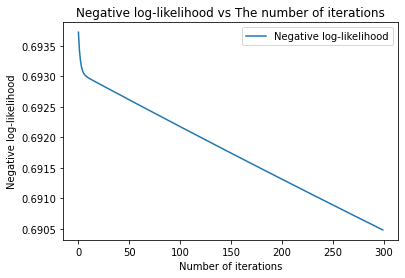

In [103]:
plt.plot(list(range(n_iteration)), cost,label='Negative log-likelihood')
plt.title('Negative log-likelihood vs The number of iterations')
plt.xlabel('Number of iterations')
plt.ylabel("Negative log-likelihood")
plt.legend()

In [104]:
X_train=tf_X_train.T
temp = np.dot(theta.T,X_train)
h_x = 1/(1+np.exp(-temp))
y_pred = np.where(h_x<0.5,0,1)
accuracy_score(Y,y_pred.T)

0.5610561056105611

In [105]:
X_test=tf_X_test.T
temp = np.dot(theta.T,X_test)
h_x = 1/(1+np.exp(-temp))
y_pred = np.where(h_x<0.5,0,1)
accuracy_score(Ytest,y_pred.T)

0.5445544554455446

In [106]:
def gradient_logistic(n_iteration, eta, lamb, X, Xtest, Y, Ytest):
  theta = np.ones((X.shape[1],1)) *0.001
  m= X.shape[0]
  cost = []
  training_miss = []
  test_miss = []
  for k in range(len(eta)):  
    dum = []
    for i in range(n_iteration):
      z = np.dot(theta.T,X.T)
      A = 1/(1+(np.exp(-z)))
      dum.append((-1/m) * np.sum(Y.T * np.log(A) + (1 - Y.T) * np.log(1 - A), axis=1) + (lamb/m) * np.sum(theta**2, axis=0))
      theta = theta - (eta[k] * np.dot(X.T, (A.T - Y))/m) - (eta[k] * (lamb/m) * theta)
    
    cost.append(np.array(dum))
    X_train= X.T
    temp = np.dot(theta.T,X_train)
    h_x = 1/(1+np.exp(-temp))
    y_pred = np.where(h_x<0.5,0,1)
    training_miss.append((1 - accuracy_score(Y,y_pred.T)))

    X_test= Xtest.T
    temp = np.dot(theta.T,X_test)
    h_x = 1/(1+np.exp(-temp))
    y_pred = np.where(h_x<0.5,0,1)
    test_miss.append((1 - accuracy_score(Ytest,y_pred.T)))

  return cost, theta, training_miss, test_miss

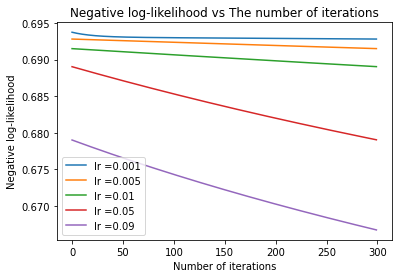

In [107]:
eta = [0.001, 0.005, 0.01, 0.05, 0.09]
n = 300


losslog, w, train_miss, test_miss = gradient_logistic(n, eta, 0.0001, tf_X_train, tf_X_test, Y, Ytest)

for k in range(len(losslog)):
  plt.plot(np.arange(n), np.asarray(losslog[k]),label='lr ='+ str(eta[k]))
 
plt.title('Negative log-likelihood vs The number of iterations')
plt.xlabel('Number of iterations')
plt.ylabel("Negative log-likelihood")
plt.legend()
plt.show()




In [108]:
print(train_miss, test_miss)



[0.4801980198019802, 0.45874587458745875, 0.4158415841584159, 0.3712871287128713, 0.3531353135313532] [0.49504950495049505, 0.4735973597359736, 0.4356435643564357, 0.3927392739273927, 0.3795379537953796]


In [109]:
tab = { 'Learning rate': eta,
       'Training misclassifications': (np.asarray(train_miss) * X.shape[0]),
       'Training missclassifion Error': train_miss,
       'Test misclassifications': (np.asarray(test_miss) * X.shape[0]),
       'Test missclassifion Error': test_miss
}

df = pd.DataFrame(tab)

print(df)

df.to_csv(path + 'hill-valley_result.csv',encoding='utf-8')

   Learning rate  ...  Test missclassifion Error
0          0.001  ...                   0.495050
1          0.005  ...                   0.473597
2          0.010  ...                   0.435644
3          0.050  ...                   0.392739
4          0.090  ...                   0.379538

[5 rows x 5 columns]


In [110]:
X_test= Xtest.T
temp = np.dot(w.T,X_test)
h_x = 1/(1+np.exp(-temp))
y_pred = np.where(h_x<0.5,0,1)
accuracy_score(Ytest,y_pred.T)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


0.8283828382838284

In [111]:
# Load data into DataFrame
train_data = pd.read_csv(path+'/dexter/dexter_train.csv',header=None)
test_data = pd.read_csv(path+'/dexter/dexter_valid.csv',header=None)
train_labels = pd.read_csv(path+'/dexter/dexter_train.labels',header=None)
test_labels = pd.read_csv(path+'/dexter/dexter_valid.labels',header=None)
# Add a foward column  of 1's on training datafor the linear constant

#data.insert(0,'const',1)

print(train_data)
print(train_labels)

     0      1      2      3      4      ...  19995  19996  19997  19998  19999
0        0      0      0      0      0  ...      0      0      0      0     56
1        0      0      0      0      0  ...      0      0      0      0      0
2        0      0      0      0      0  ...      0      0      0      0      0
3        0      0      0      0      0  ...      0      0      0      0      0
4        0      0      0      0      0  ...      0      0      0      0      0
..     ...    ...    ...    ...    ...  ...    ...    ...    ...    ...    ...
295      0      0      0      0      0  ...      0      0      0      0      0
296      0      0      0      0      0  ...      0      0      0      0      0
297      0      0      0      0      0  ...      0      0      0      0      0
298      0      0      0      0      0  ...      0      0      0      0      0
299      0      0      0      0      0  ...      0      0      0      0      0

[300 rows x 20000 columns]
     0
0    1
1   -1
2  

In [112]:
X = train_data.iloc[:,0:20000].values
Xtest = test_data.iloc[:,0:20000].values

print(X.shape, Xtest.shape)

(300, 20000) (300, 20000)


In [113]:
train_labels.replace(-1,0,inplace=True)
test_labels.replace(-1,0,inplace=True)

Y = train_labels.iloc[:].values
Ytest = test_labels.iloc[:].values

print(Ytest.shape)

(300, 1)


In [114]:
ss=StandardScaler()
ss.fit(X)
tf_X_train=ss.transform(X)
tf_X_test=ss.transform(Xtest)
print(tf_X_train,tf_X_train.shape,"\n")
print(tf_X_test,tf_X_test.shape)


[[ 0.          0.          0.         ... -0.05783149  0.
   4.94602985]
 [ 0.          0.          0.         ... -0.05783149  0.
  -0.11970821]
 [ 0.          0.          0.         ... -0.05783149  0.
  -0.11970821]
 ...
 [ 0.          0.          0.         ... -0.05783149  0.
  -0.11970821]
 [ 0.          0.          0.         ... -0.05783149  0.
  -0.11970821]
 [ 0.          0.          0.         ... -0.05783149  0.
  -0.11970821]] (300, 20000) 

[[ 0.          0.          0.         ... -0.05783149  0.
  -0.11970821]
 [ 0.          0.          0.         ... -0.05783149  0.
  -0.11970821]
 [ 0.          0.          0.         ... -0.05783149  0.
  -0.11970821]
 ...
 [ 0.          0.          0.         ... -0.05783149  0.
  -0.11970821]
 [ 0.          0.          0.         ... -0.05783149  0.
  -0.11970821]
 [ 0.          0.          0.         ... -0.05783149  0.
  -0.11970821]] (300, 20000)


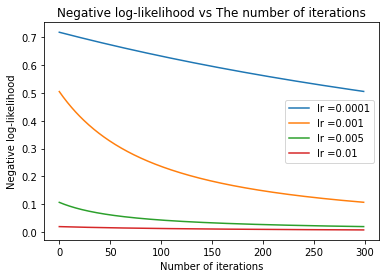

In [115]:
eta = [0.0001, 0.001, 0.005, 0.01]

n = 300


losslog2, w2, train_miss, test_miss = gradient_logistic(n, eta, 0.0001, tf_X_train, tf_X_test, Y, Ytest)

for k in range(len(losslog2)):
  plt.plot(np.arange(n), np.asarray(losslog2[k]),label='lr ='+ str(eta[k]))
 
plt.title('Negative log-likelihood vs The number of iterations')
plt.xlabel('Number of iterations')
plt.ylabel("Negative log-likelihood")
plt.legend()
plt.show()




In [116]:
print(train_miss, test_miss)
print((np.asarray(train_miss) / X.shape[0]),(np.asarray(test_miss) / Xtest.shape[0]) )

[0.0, 0.0, 0.0, 0.0] [0.4966666666666667, 0.3766666666666667, 0.2733333333333333, 0.2366666666666667]
[0. 0. 0. 0.] [0.00165556 0.00125556 0.00091111 0.00078889]


In [117]:
tab = { 'Learning rate': eta,
       'Training misclassifications': (np.asarray(train_miss) * X.shape[0]),
       'Training missclassifion Error': train_miss,
       'Test misclassifications': (np.asarray(test_miss) * X.shape[0]),
       'Test missclassifion Error': test_miss
}

df = pd.DataFrame(tab)

print(df)

df.to_csv(path + 'dexter_result.csv',encoding='utf-8')

   Learning rate  ...  Test missclassifion Error
0         0.0001  ...                   0.496667
1         0.0010  ...                   0.376667
2         0.0050  ...                   0.273333
3         0.0100  ...                   0.236667

[4 rows x 5 columns]


In [118]:
X_test=tf_X_test.T
temp = np.dot(w2.T,X_test)
h_x = 1/(1+np.exp(-temp))
y_pred = np.where(h_x<0.5,0,1)

print(y_pred.shape)

(1, 300)


In [119]:
accuracy_score(Ytest,y_pred.T)

0.7633333333333333

In [121]:
X_train=tf_X_train.T
temp = np.dot(w2.T,X_train)
h_x = 1/(1+np.exp(-temp))
y_pred = np.where(h_x<0.5,0,1)

In [122]:
accuracy_score(Y,y_pred.T)

1.0